# 1. Importing Utility Libraries

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics,tree 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
%matplotlib inline

# 2. Loading The DataSet


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length','sepal_width','petal_length','petal_width','Iris_class']
data = pd.read_csv(url, names=names)
print(data.shape)

(150, 5)


# 3. Splitting The Dataset

In [ ]:
train, test = train_test_split(data, test_size = 0.3, stratify = data['Iris_class'], random_state = 42)

In [ ]:
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train['Iris_class']
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test['Iris_class']

# 4. EDA

In [ ]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,Iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Iris_class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


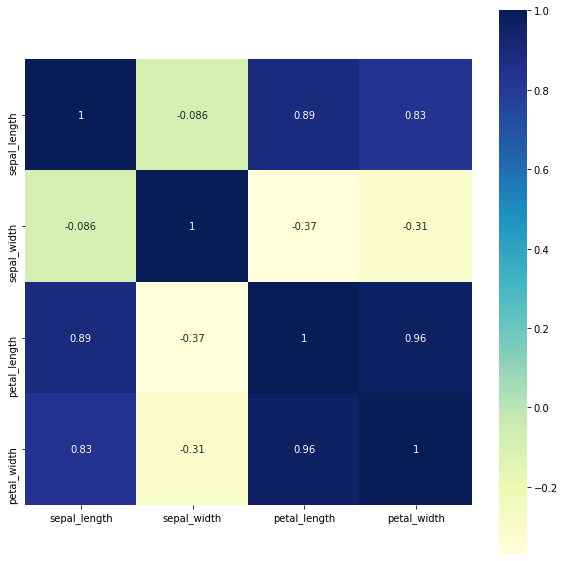

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
corr = X_train.corr()
sns.heatmap(corr, annot = True, square = True, cmap="YlGnBu", ax =ax);

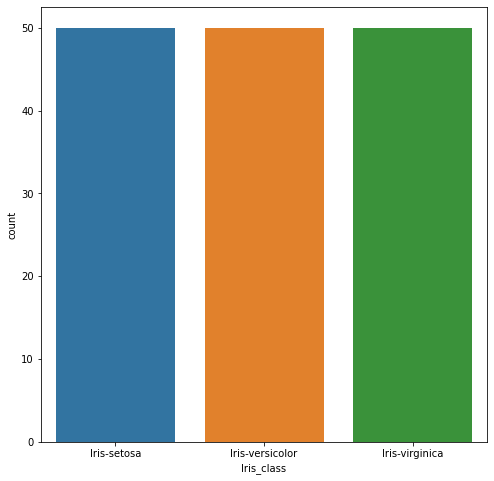

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x="Iris_class", data=data, ax = ax);

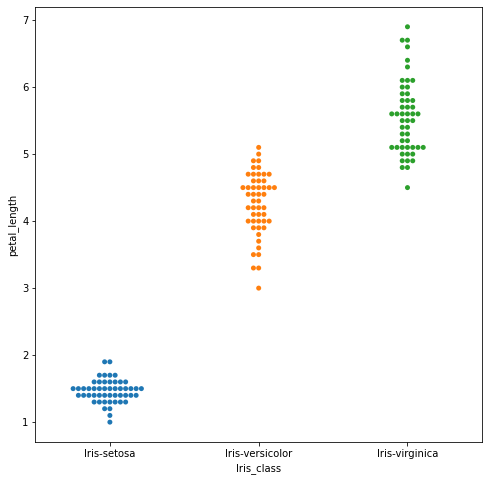

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.swarmplot(x='Iris_class', y = "petal_length", data=data, ax=ax);

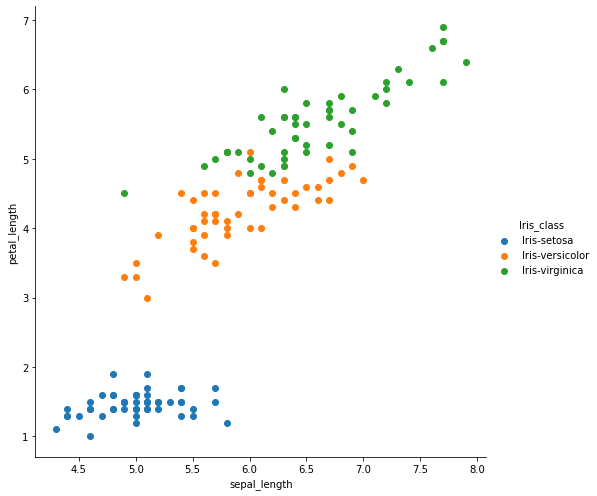

In [ ]:
sns.FacetGrid(data, hue ="Iris_class",height = 7).map(plt.scatter,'sepal_length','petal_length').add_legend();

# 5. Building Models

### (a) Support Vector Machine

In [ ]:
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
classes = ['setosa', 'versicolor', 'virginica']

In [ ]:
SVM = svm.SVC()
SVM.fit(X_train, y_train)
pred_SVM = SVM.predict(X_test)
print('The accuracy for the SVM is',metrics.accuracy_score(pred_SVM,y_test))

The accuracy for the SVM is 0.9555555555555556


In [ ]:
print('The Classification Report for the SVM is :')
print()
print( metrics.classification_report(pred_SVM,y_test))

The Classification Report for the SVM is :

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



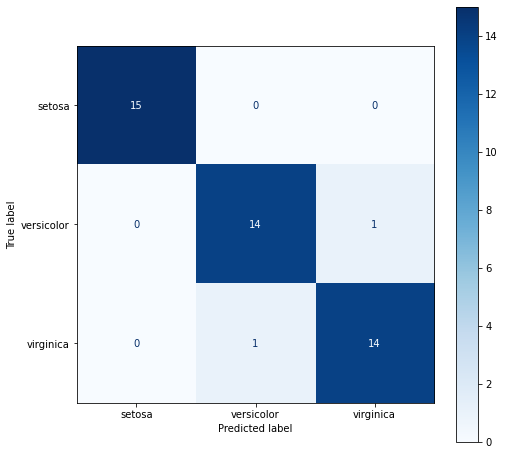

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
SVM_cm = metrics.plot_confusion_matrix(SVM, X_test, y_test,display_labels=classes, ax=ax,cmap=plt.cm.Blues)

### (b) Decision Tree Classifier

In [ ]:
DT = DecisionTreeClassifier(max_depth = 3, random_state = 1)
DT.fit(X_train,y_train)
pred_DT = DT.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(pred_DT,y_test)*100)

The accuracy of the Decision Tree is 93.33333333333333


In [ ]:
print('The Classification Report for the Decision Tree is :')
print()
print( metrics.classification_report(pred_DT,y_test))

The Classification Report for the Decision Tree is :

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.88      0.90        16
 Iris-virginica       0.87      0.93      0.90        14

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



#### Plotting Leaves of Decision Tree

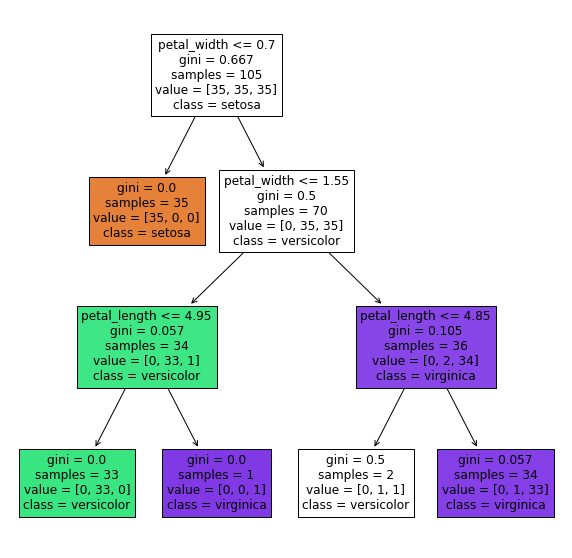

In [ ]:
plt.figure(figsize = (10,10))
plot_tree(DT, feature_names = features, class_names = classes, filled = True);

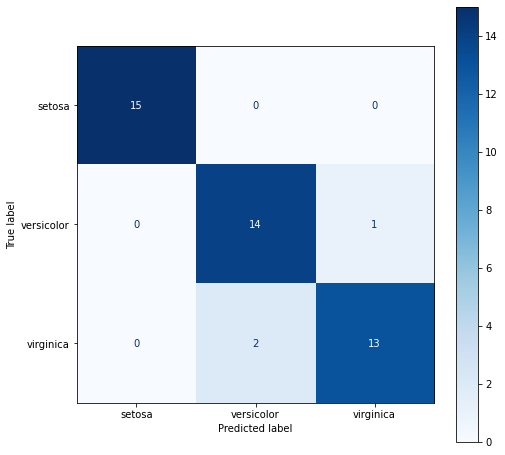

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
DT = metrics.plot_confusion_matrix(DT, X_test, y_test,
                                 display_labels=classes,
                                 ax=ax,cmap=plt.cm.Blues)


### (c) K Nearest Neighbours

In [ ]:
# Since we have 3 classes, n_neighbours = 3
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
pred_KNN=KNN.predict(X_test)
print('The accuracy for the KNN is', metrics.accuracy_score(pred_KNN,y_test))

The accuracy for the KNN is 0.9555555555555556


In [ ]:
print('The Classification Report for the KNN is :')
print()
print( metrics.classification_report(pred_KNN,y_test))

The Classification Report for the KNN is :

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.88      0.94        17
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



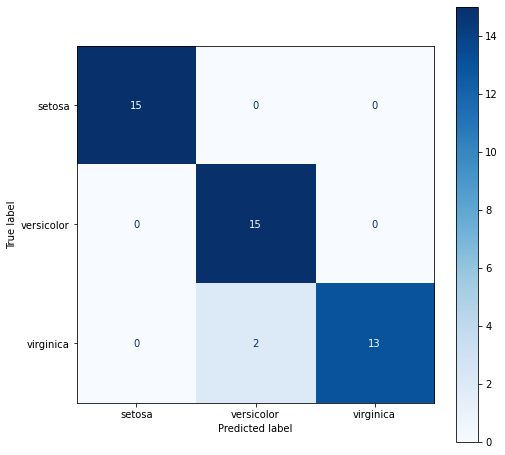

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
KNN_cm = metrics.plot_confusion_matrix(KNN, X_test, y_test,
                                 display_labels=classes,
                                 ax=ax,cmap=plt.cm.Blues)


### (d) Random Forest

In [ ]:
RF =RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train)
pred_RF = RF.predict(X_test)
print("The Accuracy for the Random Forest is:",metrics.accuracy_score(pred_RF, y_test)*100)

The Accuracy for the Random Forest is: 91.11111111111111


#### Plotting Leaves of Random Forest 

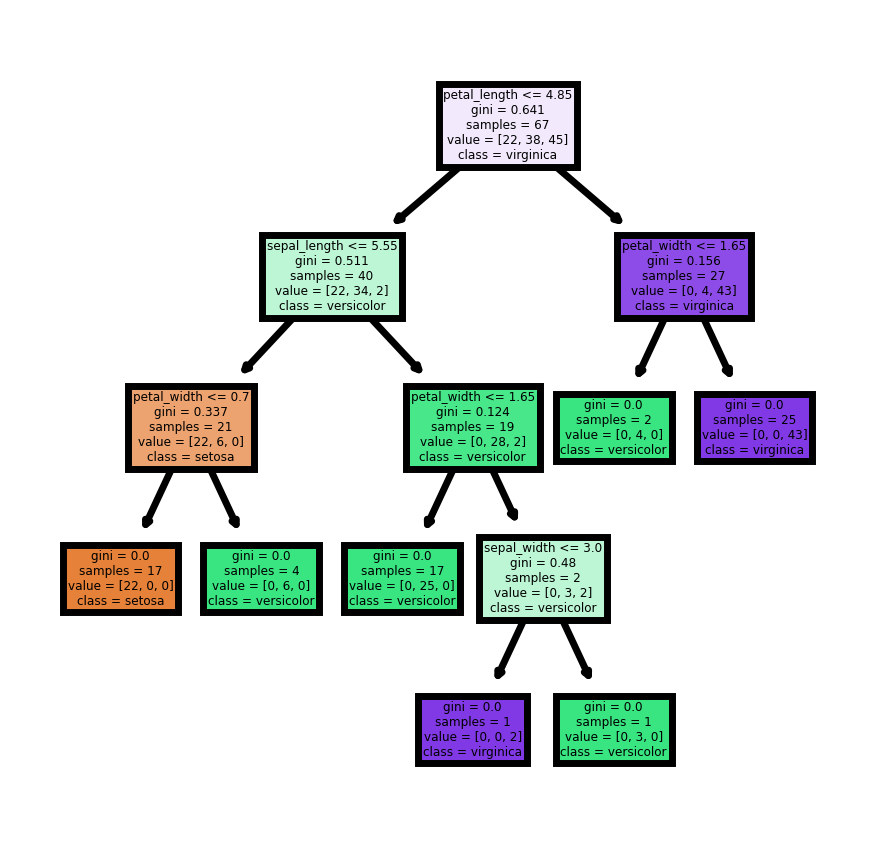

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=500)
tree.plot_tree(RF.estimators_[0],feature_names = features, class_names = classes, filled = True);
fig.savefig('RFtreeOutput.png')

In [ ]:
print('The Classification Report for the Random Forest is :')
print()
print( metrics.classification_report(pred_SVM,y_test))

The Classification Report for the Random Forest is :

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



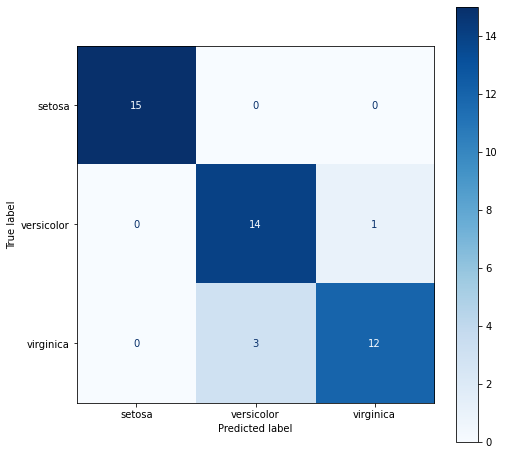

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
RF_cm = metrics.plot_confusion_matrix(RF, X_test, y_test,display_labels=classes,ax = ax, cmap = plt.cm.Blues)


### (e) GridSearchCV

In [ ]:
params_GS = params_GS = [{'kernel': ['linear'],
              'C': [ 1, 10, 100],  
              'gamma': [1e-3, 1e-4], 
              },{'kernel': ['rbf'], 'C': [1, 10, 100, 1000]} ]  
  
  
GS = GridSearchCV(svm.SVC(), param_grid = params_GS, refit = True, verbose = 3, cv=3) 

In [ ]:
GS.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.971, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.943, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.971, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.943, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=1.000, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
print(GS.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}


In [ ]:
pred_GS = GS.predict(X_test) 

In [ ]:
print('The Classification Report for the Random Forest is :')
print()
print( metrics.classification_report(pred_GS,y_test))

The Classification Report for the Random Forest is :

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.79      0.88        19
 Iris-virginica       0.73      1.00      0.85        11

       accuracy                           0.91        45
      macro avg       0.91      0.93      0.91        45
   weighted avg       0.93      0.91      0.91        45



In [ ]:
print("The Accuracy for the GridSearchCV is:",metrics.accuracy_score(pred_GS, y_test)*100)

The Accuracy for the GridSearchCV is: 91.11111111111111


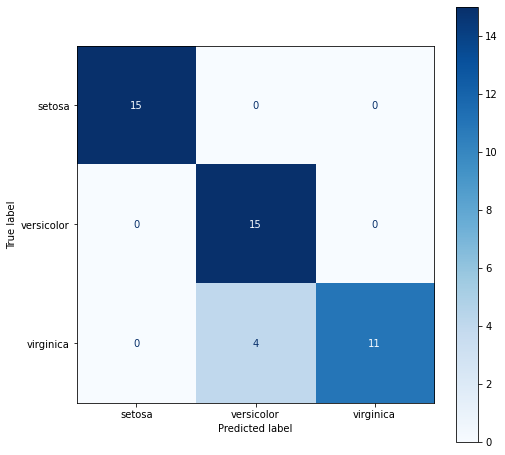

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
GS_cm = metrics.plot_confusion_matrix(GS, X_test, y_test,
                                 display_labels=classes,
                                 ax=ax,cmap=plt.cm.Blues)

# 6. Comparing Accuracies

In [ ]:
acc_DF = {'Accuracies':[95.55,93.33,95.55,91.11,91.11,], "Models": ['SVM','DT','KNN','RF','GS']}
acc_Dataframe = pd.DataFrame(data = acc_DF)
acc_Dataframe

,Accuracies,Models
0,95.55,SVM
1,93.33,DT
2,95.55,KNN
3,91.11,RF
4,91.11,GS


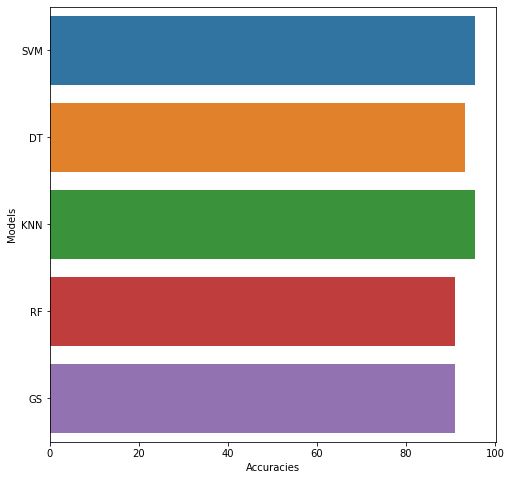

In [ ]:
 fig, ax = plt.subplots(figsize=(8, 8))
 sns.barplot(x="Accuracies", y="Models", data=acc_Dataframe,  ax = ax);

## From the above plot we can see that Support Vector Machine and K Nearest Nieghbours performs well on Iris Dataset with 95.5%  accuracy compared to other classification models. 

# Ethics Issues in Artificial Intelligence


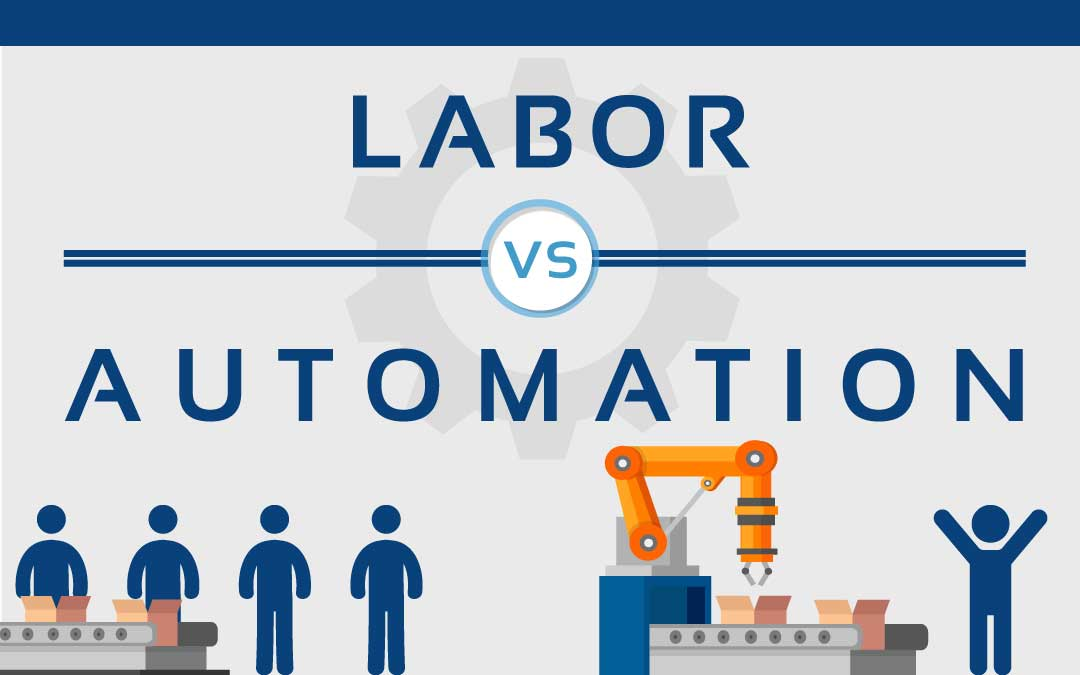

In [ ]:
from IPython.display import Image
url = 'https://p-a-t.com/wp-content/uploads/2017/07/infographic-labor_vs_automation-precision-blog.jpg'
Image(url,width=1800, height=700)

##   $\hspace{2cm}$   We cannot deny the fact that Artificial Intelligence and  Robots are replacing human jobs rapidly. AI is the biggest achievement for us human being so far, however it's a pyrrhic victory.. In retrospect, Artificial Intelligence had always been considered as a fiction, however it has become reality now and it has already surpassed human intelligence. In todays 21st century, almost every other work done by the human beings will be taken over by machine. For example, packaging job, which was traditionally done by humans, now machines can do even faster, accurate and without any breaks. However, it has hugely impacted employment. Since, machines can work tirelessly for a long time, they generate better revenue than human labors more efficiently and rapidly, but at the cost of unemployment.
##     $\hspace{2cm}$ In coming decades we are going to face massive social challenges. The only available jobs in the future will be pertaining to artificial intelligence, which will widen the economical gap even more, there could be a basic universal income, output of goods and services will be ten fold and hence everything will be pretty cheap. However, what will happen to people who derive their meaning in employment?. Even though machines can think and learn faster than humans, it can never match our ability of common sense, and that is biggest drawback of artificial Intelligence.For example, there are software where we just have to put a thought as an input and the algorithm will predict the future thoughts and try to complete it. But they are highly inaccurate when it comes to differentiating between positive and negative thoughts. The AI bots are already used in dubious ways, without adhering to any kind of morals, such as deep fakes, spamming. Concerning activities like this can only be controlled through careful use of AI and recognizing its limitations. 

## $\hspace{2cm}$Hence, we can conclude that it is not ethical to replace human employees with robotic automation and computer controlled processes. Moreover the only way to mitigate the use of these techologies is that, we will have to be mindful about when and how to use it as they are useful, when we will use them sparsely.
  
